<a href="https://colab.research.google.com/github/Greatcoderboy/cartoon-effect/blob/master/cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

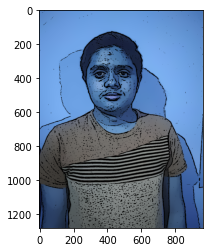

In [21]:
import cv2
from matplotlib import pyplot as plt

num_down = 2       # number of downsampling steps
num_bilateral = 7  # number of bilateral filtering steps

img_rgb = cv2.imread("/image.png")

# downsample image using Gaussian pyramid
img_color = img_rgb
for _ in range(num_down):
    img_color = cv2.pyrDown(img_color)
# repeatedly apply small bilateral filter instead of
# applying one large filter
for _ in range(num_bilateral):
    img_color = cv2.bilateralFilter(img_color, d=9,
                                    sigmaColor=9,
                                    sigmaSpace=7)

# upsample image to original size
for _ in range(num_down):
    img_color = cv2.pyrUp(img_color)


img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)
img_edge = cv2.adaptiveThreshold(img_blur, 255,
                                 cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY,
                                 blockSize=9,
                                 C=2)
img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
img_cartoon = cv2.bitwise_and(img_color, img_edge)
plt.imshow(img_cartoon)